## Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
with open("C:\\Users\\Admin\\Desktop\\ML CW\\spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
Data_set = pd.read_csv("C:\\Users\\Admin\\Desktop\\ML CW\\spambase.data", header=None, names=labels +['spam']) 
# spam = spamData.pop('spam')

Data_array=Data_set.values
# print(Data_array)


In [3]:
Data_set.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  4601


### Finding the duplicates in the dataset

In [5]:
Data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

### Dropping the duplicate values

In [6]:
Data_set.drop_duplicates(inplace=True)

In [7]:
print("No of rows in dataset after removing duplicates : ", len(Data_set))

No of rows in dataset after removing duplicates :  4210


### Finding the null values in the dataset

In [8]:
Data_set.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Removing the target column 

In [9]:
data=Data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [10]:
print("No of rows in dataset after preprocessing : ", len(Data_set))

No of rows in dataset after preprocessing :  4210


### Summary of dataset before performing Standard Scaler

In [11]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


### Performing Standard Scaling for the dataset

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,0.320730,-0.164364,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464
4206,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093
4207,0.652181,-0.248027,0.016537,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,0.243945,2.093004,-0.164364,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966
4208,2.852406,-0.248027,-0.565245,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.317435,-0.164364,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630


### Summmary of dataset after performing Standard Scaling

In [13]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,...,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,-3.480997e-15,-2.548357e-15,3.381328e-15,-2.009289e-15,-7.919384e-15,1.947347e-15,-2.535291e-15,-3.765370e-15,-4.663622e-15,2.867804e-15,...,-3.655752e-15,-3.854122e-15,-1.138071e-15,6.488607e-17,-1.913895e-15,4.962433e-15,-1.364928e-15,2.236631e-16,-7.356480e-16,-1.421138e-16
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-4.664436e-02,1.231299e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-8.897950e-02,...,-1.164071e-01,-1.600104e-01,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,3.160992e+01,1.406769e+01,2.095434e+01,1.800571e+01,2.681886e+01,1.831957e+01,2.731139e+01,...,3.338604e+01,1.720613e+01,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


# Performing PCA to the Dataset

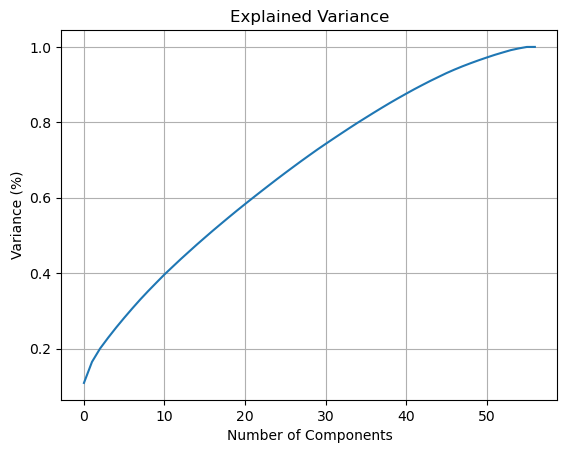

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Explained Variance')
plt.grid(True)
plt.show()

### Introducing the PCA components

In [15]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41','PC42','PC43','PC44'])

### Dataset after performing PCA

In [16]:
principal_Df.head()
# principal_Df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.766904,0.049603,-0.643972,0.037356,-0.254489,-0.329400,-0.085080,0.349933,1.750503,0.181482,...,0.359647,-0.298208,0.271079,0.124787,0.253623,0.055354,0.212593,0.206335,-0.401769,0.229047
1,-1.293574,2.007028,0.071480,-0.481290,-0.098982,-1.117792,-0.545177,0.250918,-0.309081,-0.630512,...,-0.253892,-0.116752,-0.477565,-0.186455,0.126923,0.078186,0.246556,0.552105,0.020094,0.317476
2,-1.612747,4.821310,3.137320,-1.073505,1.592111,-1.500481,-3.174783,-1.398483,1.032182,2.520206,...,2.077219,-0.010813,-0.730807,-0.290583,-0.320676,0.961462,0.856469,0.576124,0.318835,-0.766788
3,-0.857217,0.414170,-0.551307,-0.031405,-0.049885,0.703152,0.339574,-0.445368,-0.366292,0.183426,...,0.335788,-0.075195,0.056742,0.266501,-0.299761,0.481127,0.802455,-0.626307,0.340638,-0.307012
4,-0.858070,0.413503,-0.553432,-0.031665,-0.049918,0.703768,0.337827,-0.446653,-0.366638,0.183022,...,0.335108,-0.075227,0.058386,0.266993,-0.299757,0.481453,0.801624,-0.625003,0.340467,-0.306073


In [17]:
print(pca.explained_variance_)

[6.21425733 3.18296901 2.013373   1.6294121  1.5459411  1.46864587
 1.41593168 1.36728246 1.29484741 1.24508701 1.23604645 1.14931234
 1.14405095 1.10352274 1.09710498 1.06431868 1.05387724 1.02432012
 1.01637894 1.00122721 0.9790615  0.96809217 0.95332556 0.94496327
 0.93806028 0.91811534 0.90390576 0.89565081 0.87378139 0.86520242
 0.83052738 0.81860637 0.81016868 0.80207959 0.78869926 0.76015606
 0.75803033 0.74211292 0.72616362 0.70232322 0.68154639 0.67103512
 0.63869928 0.62583596]


In [18]:
print(pca.components_)

[[-0.04690805 -0.02058    -0.05221265 ... -0.02020219 -0.03395569
  -0.04960886]
 [ 0.14443589  0.11188832  0.14576687 ...  0.13599273  0.23902201
   0.2084728 ]
 [-0.03012266 -0.02134702 -0.03047683 ...  0.30346577  0.46502428
   0.38998741]
 ...
 [-0.15191066  0.21032486 -0.00152753 ... -0.09149123  0.04251296
   0.48165484]
 [ 0.1177961   0.13551112  0.06673887 ... -0.09701496  0.03093352
   0.08565739]
 [ 0.12724114 -0.26264681  0.00764141 ... -0.15769501 -0.02148995
   0.37604043]]


## Build the predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [19]:
X = principal_Df.iloc[:,0:44].values
y = Data_set.iloc[:, 57].values

### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Fitting classifier to the Training set

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Accuracy of testing dataset

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.8646080760095012

### Checking accuracy of training dataset


In [25]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9994061757719715

### Visualizing our final decision tree


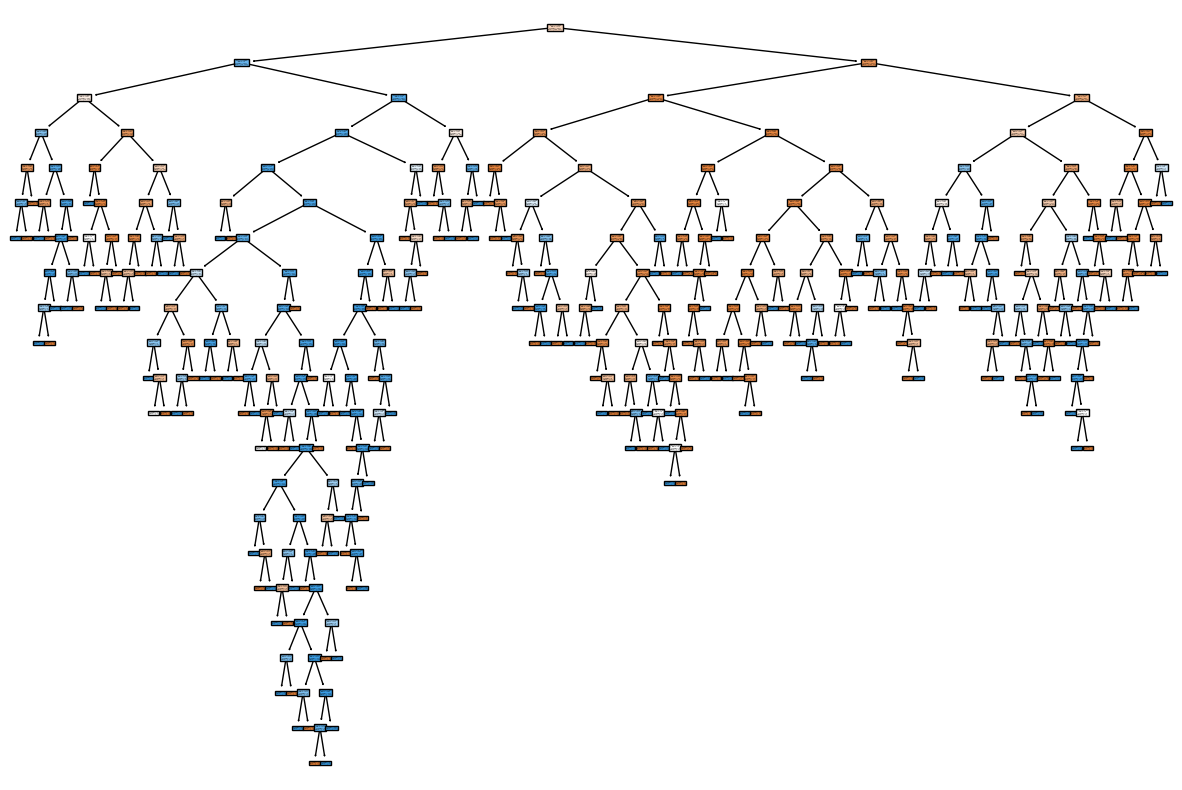

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### Summary of the test dataset

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       495
           1       0.84      0.83      0.84       347

    accuracy                           0.86       842
   macro avg       0.86      0.86      0.86       842
weighted avg       0.86      0.86      0.86       842

[[439  56]
 [ 58 289]]


### Summary of the training dataset

In [28]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2036
           1       1.00      1.00      1.00      1332

    accuracy                           1.00      3368
   macro avg       1.00      1.00      1.00      3368
weighted avg       1.00      1.00      1.00      3368

[[2036    0]
 [   2 1330]]


### Evaluating the false positive rate and true positive rate

In [30]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)

### Plotting ROC curve for our Decision Tree

In [31]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.8609699298460106

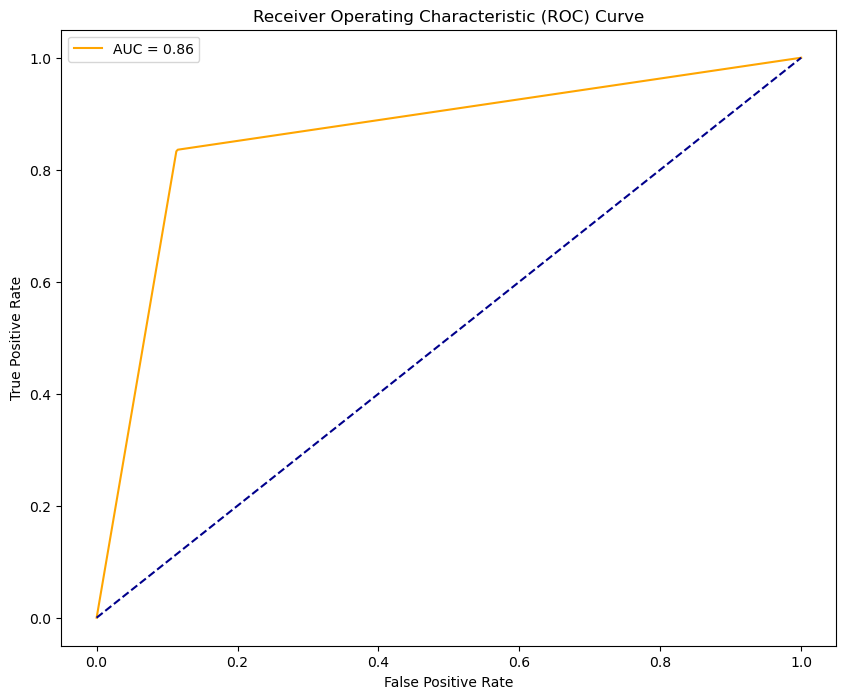

In [32]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt,tpr_dt)

### Pruning the decision tree

In [33]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

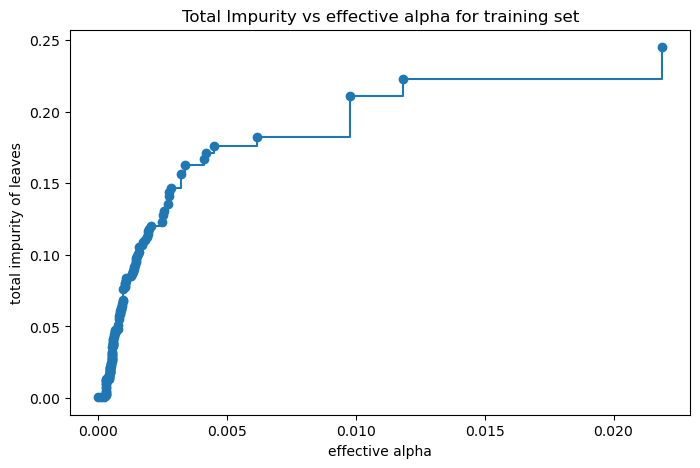

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [35]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23326275844014305


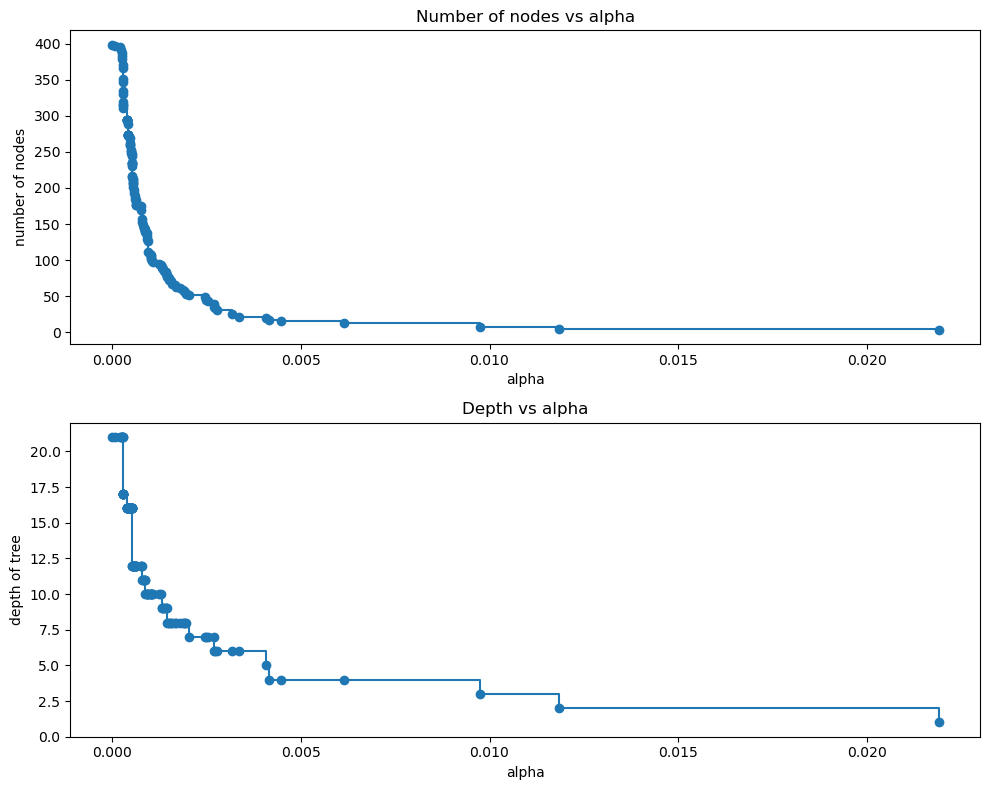

In [36]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

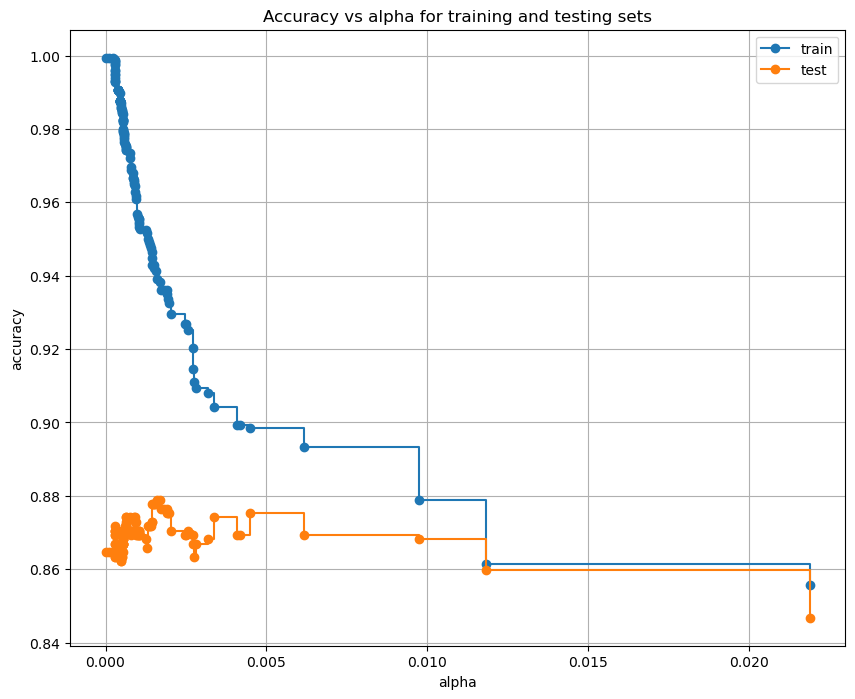

In [37]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [39]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [40]:
from sklearn.metrics import accuracy_score

pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8598574821852731

In [41]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.8613420427553444

[Text(0.6, 0.8333333333333334, 'X[0] <= -0.628\ngini = 0.478\nsamples = 3368\nvalue = [2036, 1332]'),
 Text(0.4, 0.5, 'X[1] <= -0.039\ngini = 0.3\nsamples = 1338\nvalue = [246, 1092]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.497\nsamples = 239\nvalue = [129, 110]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.19\nsamples = 1099\nvalue = [117, 982]'),
 Text(0.8, 0.5, 'gini = 0.208\nsamples = 2030\nvalue = [1790, 240]')]

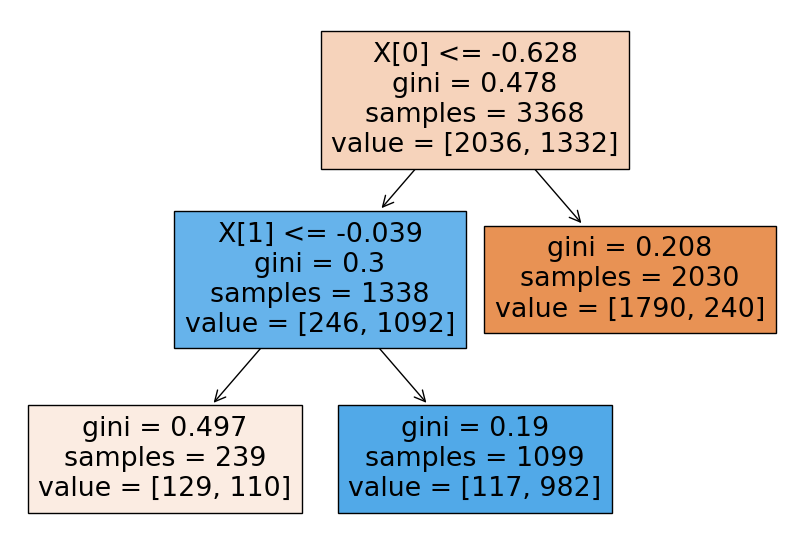

In [44]:
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(clf,filled=True)